In [152]:
# Import modules and clean data
import pandas as pd
import numpy as np

cleveland = pd.read_csv('processed.cleveland.data')
switzerland = pd.read_csv('processed.switzerland.data')
df = pd.concat([cleveland, switzerland])
df.replace('?', np.NAN, inplace=True)
df.dropna(thresh=13, inplace = True)
df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace = True)
df = df.astype(float)
df.ca.fillna( df.ca.mean().__round__(), inplace = True)
df.thal.fillna(df.thal.mean().__round__(), inplace = True)
df = df.convert_dtypes()
df.num = df.num.astype(int)
df.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
262,60,0,1,150,240,0,0,171,0,0.9,1,0,3,0
339,66,1,4,150,0,0,0,108,1,2.0,2,1,7,3
101,34,1,1,118,182,0,2,174,0,0.0,1,0,3,0


In [153]:
# Create copy dataframe with binary clasification
df_ = df.copy()
df_.num.replace([1,2,3,4], 1, inplace= True)
print(df_.num.value_counts(),'\n', df.num.value_counts())

1    181
0    165
Name: num, dtype: int64 
 0    165
1     67
3     50
2     48
4     16
Name: num, dtype: int64


In [154]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('num',axis=1), df['num'], test_size=0.29, random_state=1234)
X_train_, X_test_, y_train_, y_test_ = train_test_split(df_.drop('num',axis=1), df_['num'], test_size=0.29, random_state=1234)

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c:\Users\Louviers\anaconda3\envs\pAnDaS\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest scores trained on dataset with 5 classifications: 
{'Accuracy': 0.45544554455445546, 'Precision': 0.3773948823453774, 'Recall': 0.45544554455445546}
Random forest scores trained on dataset with 2 classifications: 
{'Accuracy': 0.8613861386138614, 'Precision': 0.9090909090909091, 'Recall': 0.847457627118644}


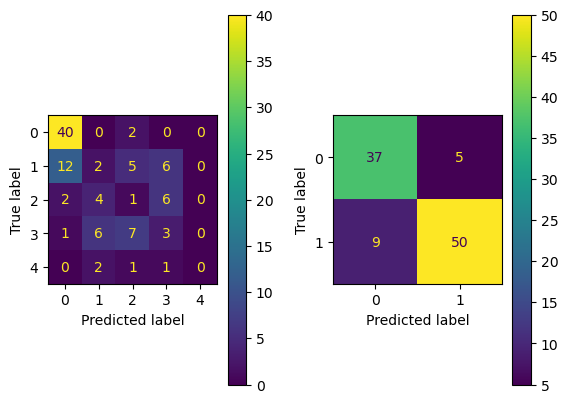

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Fit random forest models
RFC_advanced = RandomForestClassifier(
    n_estimators=150, min_samples_split=3, criterion="entropy", random_state=1234
    ).fit(X_train, y_train)

RFC_basic = RandomForestClassifier(
    n_estimators=150, min_samples_split=3, criterion="entropy", random_state=1234
    ).fit(X_train_, y_train_)


# Score the models
RFC_advanced_scores = {
    "Accuracy":accuracy_score(y_test, RFC_advanced.predict(X_test)),
    "Precision":precision_score(y_test, RFC_advanced.predict(X_test), average = "weighted"),
    "Recall":recall_score(y_test, RFC_advanced.predict(X_test), average = "weighted")
}
RFC_basic_scores = {
    "Accuracy":accuracy_score(y_test_, RFC_basic.predict(X_test_)),
    "Precision":precision_score(y_test_, RFC_basic.predict(X_test_)),
    "Recall":recall_score(y_test_, RFC_basic.predict(X_test_))
}
print(f'Random forest scores trained on dataset with 5 classifications: \n{RFC_advanced_scores}')
print(f'Random forest scores trained on dataset with 2 classifications: \n{RFC_basic_scores}')
cm = confusion_matrix(y_test, RFC_advanced.predict(X_test))
cm_ = confusion_matrix(y_test_, RFC_basic.predict(X_test_))
fig, axes = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.35)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0])
ConfusionMatrixDisplay(confusion_matrix=cm_).plot(ax=axes[1])

In [157]:
# Import svm and normalize data
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
X_train_standard = MinMaxScaler().fit_transform(X_train)
X_test_standard = MinMaxScaler().fit_transform(X_test)
X_train_standard_ = MinMaxScaler().fit_transform(X_train_)
X_test_standard_ = MinMaxScaler().fit_transform(X_test_)

Support vector scores trained on dataset with 5 classifications: 
{'Accuracy': 0.49504950495049505, 'Precision': 0.42664623605217666, 'Recall': 0.49504950495049505}
support vector scores trained on dataset with 2 classifications: 
{'Accuracy': 0.8217821782178217, 'Precision': 0.9019607843137255, 'Recall': 0.7796610169491526}


c:\Users\Louviers\anaconda3\envs\pAnDaS\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


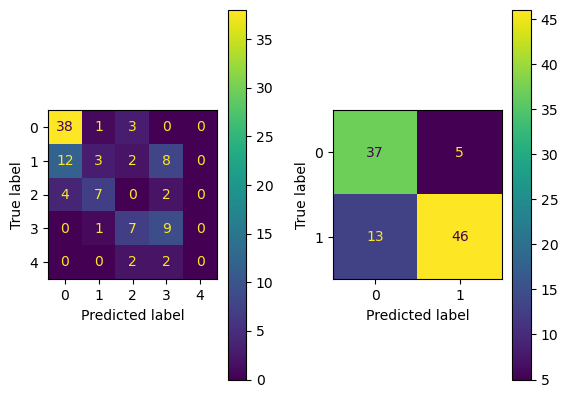

In [158]:
# Fit SVM models
SVM_advanced = SVC(kernel = 'linear').fit(X_train_standard, y_train)
SVM_basic = SVC(kernel = 'linear').fit(X_train_standard_, y_train_)

# Score the models
SVM_advanced_scores = {
    "Accuracy":accuracy_score(y_test, SVM_advanced.predict(X_test_standard)),
    "Precision":precision_score(y_test, SVM_advanced.predict(X_test_standard), average = "weighted"),
    "Recall":recall_score(y_test, SVM_advanced.predict(X_test_standard), average = "weighted")
}
SVM_basic_scores = {
    "Accuracy":accuracy_score(y_test_, SVM_basic.predict(X_test_standard_)),
    "Precision":precision_score(y_test_, SVM_basic.predict(X_test_standard_)),
    "Recall":recall_score(y_test_, SVM_basic.predict(X_test_standard_))
}
print(f'Support vector scores trained on dataset with 5 classifications: \n{SVM_advanced_scores}')
print(f'support vector scores trained on dataset with 2 classifications: \n{SVM_basic_scores}')
cm = confusion_matrix(y_test, SVM_advanced.predict(X_test_standard))
cm_ = confusion_matrix(y_test_, SVM_basic.predict(X_test_standard_))
fig, axes = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.35)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0])
ConfusionMatrixDisplay(confusion_matrix=cm_).plot(ax=axes[1])

{'age': True, 'sex': False, 'cp': False, 'trestbps': False, 'chol': True, 'fbs': False, 'restecg': False, 'thalach': True, 'exang': False, 'oldpeak': True, 'slope': False, 'ca': True, 'thal': True}


<AxesSubplot:>

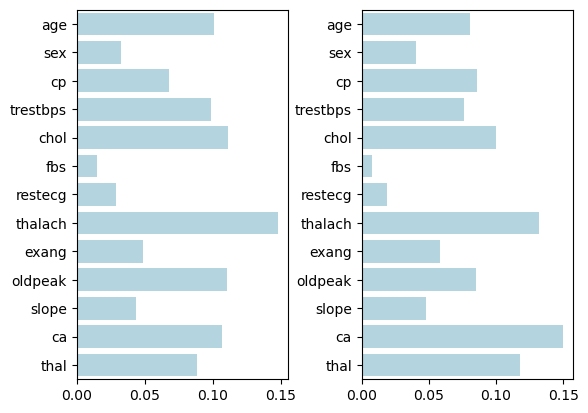

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
#Finding important features for correlations
#Returns array with True for all feature importances greater than the mean value of all feature importances
adv_importances = SelectFromModel(RFC_advanced).get_support()
bas_importances = SelectFromModel(RFC_basic).get_support()

#Finding features important in both RF classifiers
most_important = []
for x in range(len(adv_importances)):
    if adv_importances[x] == bas_importances[x] and adv_importances[x] == True:
        most_important.append(True)
    else:
        most_important.append(False)
most_imp_dict = {}
for A, B in zip(df.drop('num',axis=1).columns, most_important):
    most_imp_dict[A] = B

#Returns dict of most important features
print(most_imp_dict)
#Create bar graphs with feature importances
fig, axes = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.35)
sns.barplot(x=RFC_advanced.feature_importances_, y=df.drop('num',axis=1).columns, ax=axes[0], color='lightblue')
sns.barplot(x=RFC_basic.feature_importances_, y=df.drop('num',axis=1).columns, ax=axes[1], color='lightblue')

<AxesSubplot:xlabel='num', ylabel='ca'>

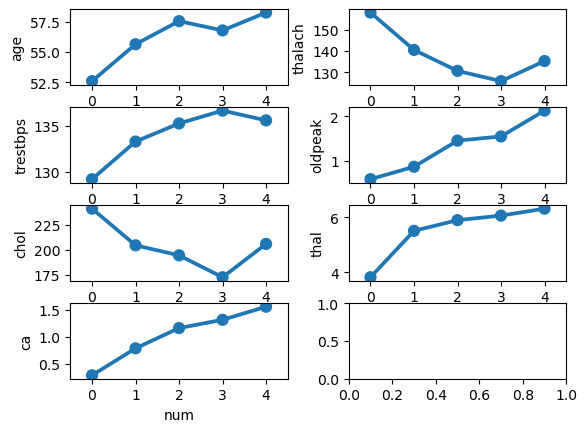

In [160]:
#Creating lineplots for features most important to identifying heart disease to show their correlation 
fig, axes = plt.subplots(4, 2)
fig.subplots_adjust(wspace=0.28, hspace = 0.3)
sns.pointplot(df, x='num', y='age', ax=axes[0,0], errorbar=None)
sns.pointplot(df, x='num', y='trestbps', ax=axes[1,0], errorbar=None)
sns.pointplot(df, x='num', y='chol', ax=axes[2,0], errorbar=None)
sns.pointplot(df, x='num', y='thalach', ax=axes[0,1], errorbar=None)
sns.pointplot(df, x='num', y='oldpeak', ax=axes[1,1], errorbar=None)
sns.pointplot(df, x='num', y='thal', ax=axes[2,1], errorbar=None)
sns.pointplot(df, x='num', y='ca', ax=axes[3,0], errorbar=None)